In [1]:
!git clone https://github.com/amir-saniyan/HodaDatasetReader.git

Cloning into 'HodaDatasetReader'...
remote: Enumerating objects: 24, done.
remote: Total 24 (delta 0), reused 0 (delta 0), pack-reused 24
Receiving objects: 100% (24/24), 6.34 MiB | 24.98 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [2]:
import matplotlib.pyplot as plt
from HodaDatasetReader.HodaDatasetReader import read_hoda_dataset

In [3]:
X_train, y_train = read_hoda_dataset('/content/HodaDatasetReader/DigitDB/Train 60000.cdb')
X_test, y_test = read_hoda_dataset('/content/HodaDatasetReader/DigitDB/Test 20000.cdb')

In [4]:
X_train.shape

(60000, 1024)

In [6]:
y_train.shape

(60000,)

In [12]:
y_train

array([6., 5., 0., ..., 2., 6., 6.], dtype=float32)

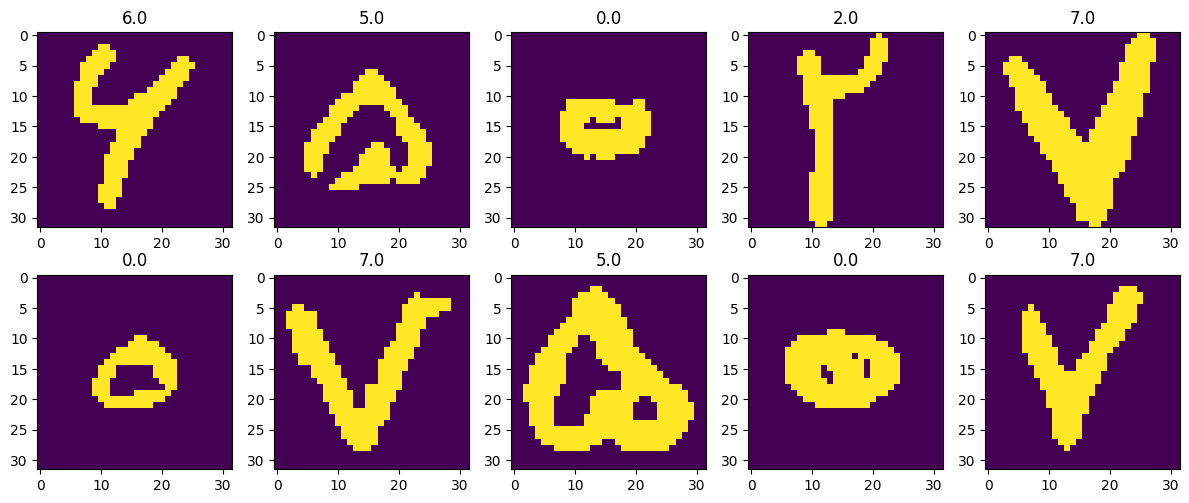

In [5]:
plt.figure(figsize=(12,5))
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(X_train[i].reshape(32,32))
  plt.title(y_train[i])

plt.tight_layout()
plt.show()

In [8]:
##Import the libraries
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

In [32]:
# Building the neural network (Here we are using 2 hidden layers and one branched layer with 10 neurons each)
##define input layer
input_layer = Input(shape=(1024,), name='input_layer')

##Defining 3 hidden layers
Layer_1 = Dense(32, activation="relu", name='Layer_1')(input_layer)
Layer_2 = Dense(64, activation="relu", name='Layer_2')(Layer_1)
Layer_3 = Dense(32, activation="relu", name='Layer_3')(Layer_2)

##Defining output layer
output = Dense(10, activation="softmax", name='output')(Layer_3)

##Defining the model by specifying the input and output layers
model = Model(inputs=input_layer, outputs=output)

In [28]:
##summary of the model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 1024)]            0         
                                                                 
 Layer_1 (Dense)             (None, 32)                32800     
                                                                 
 Layer_2 (Dense)             (None, 64)                2112      
                                                                 
 Layer_3 (Dense)             (None, 32)                2080      
                                                                 
 output (Dense)              (None, 10)                330       
                                                                 
Total params: 37322 (145.79 KB)
Trainable params: 37322 (145.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
## defining the optimiser and loss function
from keras.optimizers import Adam
from keras.losses import SparseCategoricalCrossentropy
from keras.metrics import F1Score, Accuracy

adam = Adam(learning_rate=0.01, beta_1=0.91, beta_2=0.998)
scce = SparseCategoricalCrossentropy()
#metric = Accuracy()

model.compile(optimizer=adam, loss=scce, metrics=['accuracy'])

##training the model
history = model.fit(X_train, y_train, epochs=10, verbose=True,
                    batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.1874 - accuracy: 0.9494 - val_loss: 0.2431 - val_accuracy: 0.9380
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1278 - accuracy: 0.9681 - val_loss: 0.2161 - val_accuracy: 0.9461
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1167 - accuracy: 0.9723 - val_loss: 0.2337 - val_accuracy: 0.9440
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1048 - accuracy: 0.9751 - val_loss: 0.2512 - val_accuracy: 0.9458
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0920 - accuracy: 0.9779 - val_loss: 0.2470 - val_accuracy: 0.9530
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0937 - accuracy: 0.9778 - val_loss: 0.2625 - val_accuracy: 0.9535
Epoch 7/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0896 - accuracy: 0.9793 - val_loss: 0.2344 - val_accuracy:

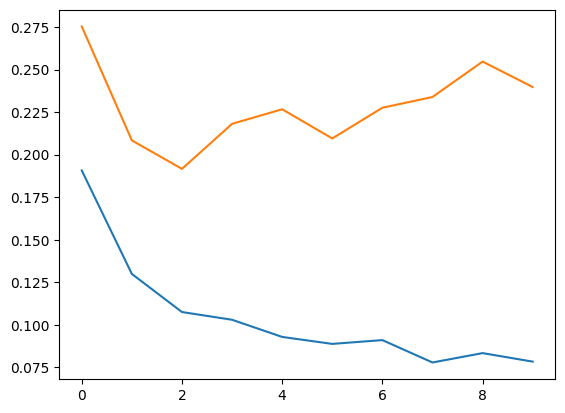

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])